### EDA part 1:
* #### early insights from studying the meta data and "2024-Federal-AI-Use-Case-Inventory" :

### 🧩 Step 1 – Identify and label columns before the target (`17_impact_type`)

#### Goal
Before deciding what to drop, classify every feature that appears **before** the label into high-level analytic categories. This keeps signal-bearing fields (like text narratives) while safely removing purely administrative/descriptive identifiers.

---

### 1️⃣ Columns before the label (in `case_dat_standardized`)
| YAML Code          | Suggested Category     | Rationale |
|--------------------|------------------------|-----------|
| 2_use_case_name    | **Context / Metadata** | Title/identifier; not a model feature. |
| 3_agency           | **Context / Metadata** | High-level agency name (identifier). |
| 4_bureau           | **Context / Metadata** | Sub-agency/bureau (identifier). |
| 8_topic_area       | **Context / Metadata** | Broad topical class (useful if encoded). |
| 10_commercial_ai   | **Context / Metadata** | Commercial vs. custom; simple categorical. |
| 11_purpose_benefits| **Narrative (Text)**   | Qualitative purpose/benefits; key for NLP. |
| 12_outputs         | **Narrative (Text)**   | Free-text outputs; key for NLP. |
| 16_dev_stage       | **Context / Metadata** | Development stage; categorical. |
| 17_impact_type     | **Target Label**       | Rights-/safety-impacting indicator. |

---

### 2️⃣ Interpretation
- **Keep (likely):**  
  - `11_purpose_benefits`, `12_outputs` — rich textual signal for NLP/classification.  
  - Optionally `8_topic_area`, `16_dev_stage` — lightweight structured predictors.
- **Drop or limit (likely):**  
  - `2_use_case_name`, `3_agency`, `4_bureau` — administrative IDs (risk of leakage, low generalizability).  
  - `10_commercial_ai` — keep only if you expect a substantive link to the label.

---

### 3️⃣ Next Step
Use this categorization to guide cleaning and row filtering:
1. Tag these columns with a `feature_category` (Context, Narrative, Target).
2. **Then** assess row missingness **within the kept features only**.
3. Proceed to Step 2 — quantify how many records lack values **after** `17_impact_type`.


### 🧩 Step 2 – Identify and label columns after the target (`17_impact_type`)

### Goal
Now that the target variable (`17_impact_type`) is defined, we’ll categorize all **subsequent columns** in `case_dat_standardized` to understand which capture policy-relevant signals (e.g., governance, compliance, or operational characteristics) and which might be redundant or sparse.  
This helps us later when we evaluate missingness and decide which records are informative enough to keep.

---

### 1️⃣ Columns after the label

| YAML Code | Suggested Category | Rationale |
|------------|--------------------|------------|
| 18_date_initiated | **Context / Metadata** | When the AI initiative started — temporal marker. |
| 19_date_acq_dev_began | **Context / Metadata** | Start of acquisition/development phase. |
| 20_date_implemented | **Context / Metadata** | Implementation completion date. |
| 21_date_retired | **Context / Metadata** | When the system was retired or decommissioned. |
| 22_dev_method | **Governance / Operational** | Whether the system was built in-house or via contract. |
| 23_contract_piids | **Governance / Operational** | Procurement identifiers; procedural detail. |
| 24_hisp_support | **Context / Metadata** | Whether tied to a High-Impact Service Provider. |
| 25_hisp_name | **Context / Metadata** | Name of the specific HISP service. |
| 26_public_service | **Context / Metadata** | Public-facing service supported. |
| 27_public_info | **Governance / Transparency** | Indicates if information is publicly shared. |
| 28_iqa_compliance | **Governance / Compliance** | Information Quality Act compliance indicator. |
| 29_contains_pii | **Governance / Compliance** | Whether personally identifiable information (PII) is used. |
| 30_saop_review | **Governance / Compliance** | Privacy risk review by Senior Agency Official for Privacy (SAOP). |
| 31_data_catalog | **Governance / Data Management** | Access to data catalog or repository. |
| 33_agency_data | **Governance / Data Management** | Agency-owned training or evaluation data. |
| 34_data_docs | **Governance / Data Management** | Availability of documentation for training/evaluation data. |
| 35_demo_features | **Governance / Fairness** | Whether demographic features are used in the model. |
| 37_custom_code | **Operational / Technical** | Whether custom code is involved. |
| 38_code_access | **Governance / Transparency** | Agency access to model code. |
| 39_code_link | **Governance / Transparency** | Link to public/open-source code (if available). |
| 40_has_ato | **Governance / Compliance** | Whether an Authority to Operate (ATO) exists. |
| 41_system_name | **Context / Metadata** | Internal system identifier. |
| 42_dev_tools_wait | **Operational / Technical** | Wait time for development tools. |
| 43_infra_provisioned | **Operational / Technical** | How IT infrastructure is provisioned. |
| 45_compute_request | **Operational / Technical** | Process for requesting compute resources. |
| 47_timely_resources | **Operational / Governance** | Timeliness of resource provisioning. |
| 49_existing_reuse | **Operational / Efficiency** | Degree of re-use of existing tools/infrastructure. |
| 50_internal_review | **Governance / Oversight** | Whether an internal review occurred. |
| 51_extension_request | **Governance / Oversight** | Request for implementation extension. |
| 52_impact_assessment | **Governance / Oversight** | Whether an AI impact assessment has been completed. |
| 53_real_world_testing | **Governance / Validation** | Real-world or operational testing conducted. |
| 54_key_risks | **Narrative (Text)** | Free-text listing of key risks — rich for NLP. |
| 55_independent_eval | **Governance / Oversight** | Whether independent evaluation occurred. |
| 56_monitor_postdeploy | **Governance / Oversight** | Post-deployment performance monitoring. |
| 57_autonomous_impact | **Governance / Safety** | Potential for autonomous action with human impact. |
| 59_ai_notice | **Governance / Transparency** | Whether users are notified they interact with AI. |
| 61_adverse_impact | **Governance / Fairness** | Whether potential adverse impacts were identified. |
| 62_disparity_mitigation | **Governance / Fairness** | Actions to mitigate demographic disparities. |
| 63_stakeholder_consult | **Governance / Inclusiveness** | Whether affected groups were consulted. |
| 65_appeal_process | **Governance / Accountability** | Process for appeals or contesting decisions. |
| 66_no_appeal_reason | **Governance / Accountability** | Reason for no appeal process (if missing). |
| 67_opt_out | **Governance / Rights** | Whether users can opt out in favor of a human alternative. |

---

### 2️⃣ Interpretation

- **High-value predictors:**  
  - *Governance & Compliance* fields (50–67 range) — oversight, accountability, fairness, and rights protections.  
    These often correlate with the label `17_impact_type` and will likely serve as important predictors.  
  - *Narrative text* (`54_key_risks`) — potential for NLP analysis.  

- **Lower-value / Descriptive fields:**  
  - *Context & Metadata* (18–21, 24–26, 41) — purely descriptive or temporal; may be kept for auditing but dropped from modeling if not predictive.  

- **Sparse or procedural fields:**  
  - *Operational / Technical* (42–49) — may have many NaNs; evaluate completeness before retaining.

---

### 3️⃣ Next Step
1. Quantify **missingness** for each post-impact feature category.  
2. Identify records with **no non-null values** across these columns — candidates for removal before modeling.  
3. Visualize missingness patterns (e.g., bar chart or heatmap) to assess where data density drops off.


 ***

***

In [3]:
# set up page for EDA (impot basic packages required for EDA)
import pandas as pd # for data ops
import numpy as np  # for numeric ops

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# read data
data = pd.read_csv("case_dat_standardized.yamlcols.csv")

data.head(2)

,2_use_case_name,3_agency,3_abr,4_bureau,8_topic_area,8_question_type,10_commercial_ai,11_purpose_benefits,12_outputs,16_dev_stage,...,59_ai_notice,63_question_type,61_adverse_impact,62_disparity_mitigation,63_stakeholder_consult,67_question_type,65_appeal_process,66_no_appeal_reason,67_opt_out,47_question_type.1
0,Non-Intrusive Inspection (NII) 3D Imaging Tool,Department of Homeland Security,DHS,CBP,Law & Justice,NaN,None of the above.,"Utilizes AI/ML to generate high resolution, ra...",Detection alerts for Items of Interest.,Implementation and Assessment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Babel,Department of Homeland Security,DHS,CBP,Law & Justice,NaN,None of the above.,CBP uses this tool to conduct targeted queries...,Babel utilizes AI modules for Text detection a...,Implementation and Assessment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# data dimentions
data.shape

(2133, 62)

### 🧩 Step 3 – Understanding Missingness

#### Goal
Instead of inspecting missingness one column at a time, we’ll take a **layered approach** that starts with broad data structure insights and narrows down to specific problem areas.

This approach balances interpretability and efficiency in a high-dimensional dataset.

---

#### 1️⃣ Layer 1 — Macro-Level Overview
**Objective:** Get a general sense of completeness across the entire dataset.

**What to do:**
- Use `df.isna().mean()` to compute the **percentage of missing values per column**.
- Visualize with a horizontal barplot for the top N columns with the highest missingness.
- Use `missingno.matrix(df)` for a quick structural view (where missing fields cluster).

**Why:**
Shows which parts of the schema are sparsely populated (e.g., post-implementation governance vs. pre-implementation metadata).

---

#### 2️⃣ Layer 2 — Section-Level Missingness
**Objective:** Assess missingness by logical feature groups rather than by individual column.

**What to do:**
- Group columns by your earlier categories:
  - Context & Metadata  
  - Narrative (Text)  
  - Governance & Compliance  
  - Operational / Technical  
- For each group, calculate the **average proportion of missing values**.
- Visualize using a small grouped bar chart.

**Why:**
Reveals which categories of variables (e.g., governance vs. narrative) are systematically underreported.

---

#### 3️⃣ Layer 3 — Record-Level Completeness
**Objective:** Identify rows (use cases) that are mostly empty.

**What to do:**
- Compute the proportion of non-null cells **per record**:
  ```python
  completeness = case_dat_std.notna().mean(axis=1)


In [6]:
# layer 1, macro level misingness check:
missing_pct = data.isna().mean().sort_values(ascending = False) * 100

# get quick summaries
print(f"data set shape:{data.shape}")                                                  # data set dimension
print(f"average missingness:{missing_pct.mean():.1f}%")                               # avergae missingness
print(f"number of columns with > 50% missing values:{(missing_pct > 50).sum()}")       # number of columns wit 50+ % missing values


data set shape:(2133, 62)
average missingness:62.1%
number of columns with > 50% missing values:40


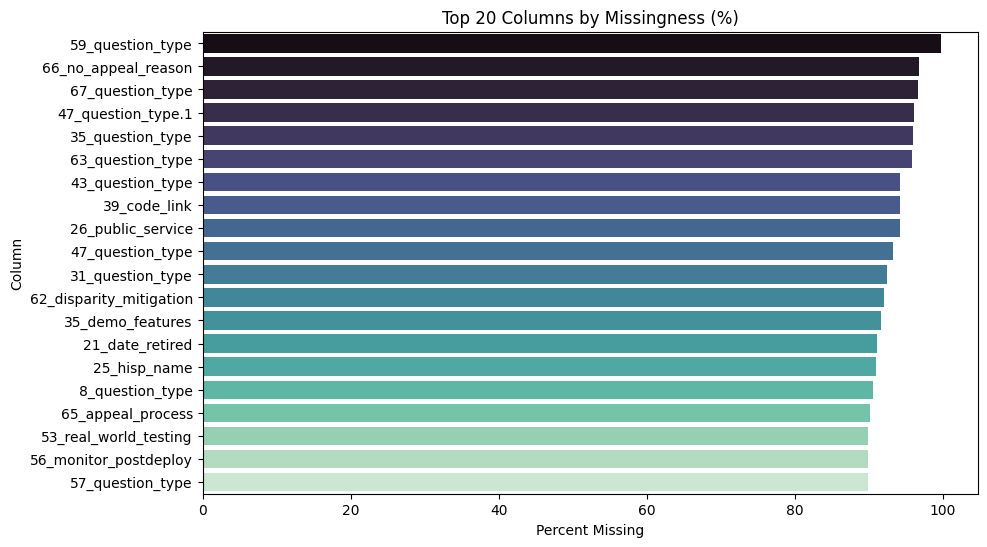

In [7]:
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_pct.head(top_n),
    y=missing_pct.head(top_n).index,
    hue=missing_pct.head(top_n).index,   # use column names as hue
    palette="mako",
    legend=False)
plt.title(f"Top {top_n} Columns by Missingness (%)")
plt.xlabel("Percent Missing")
plt.ylabel("Column")
plt.show()

<Figure size 1200x500 with 0 Axes>

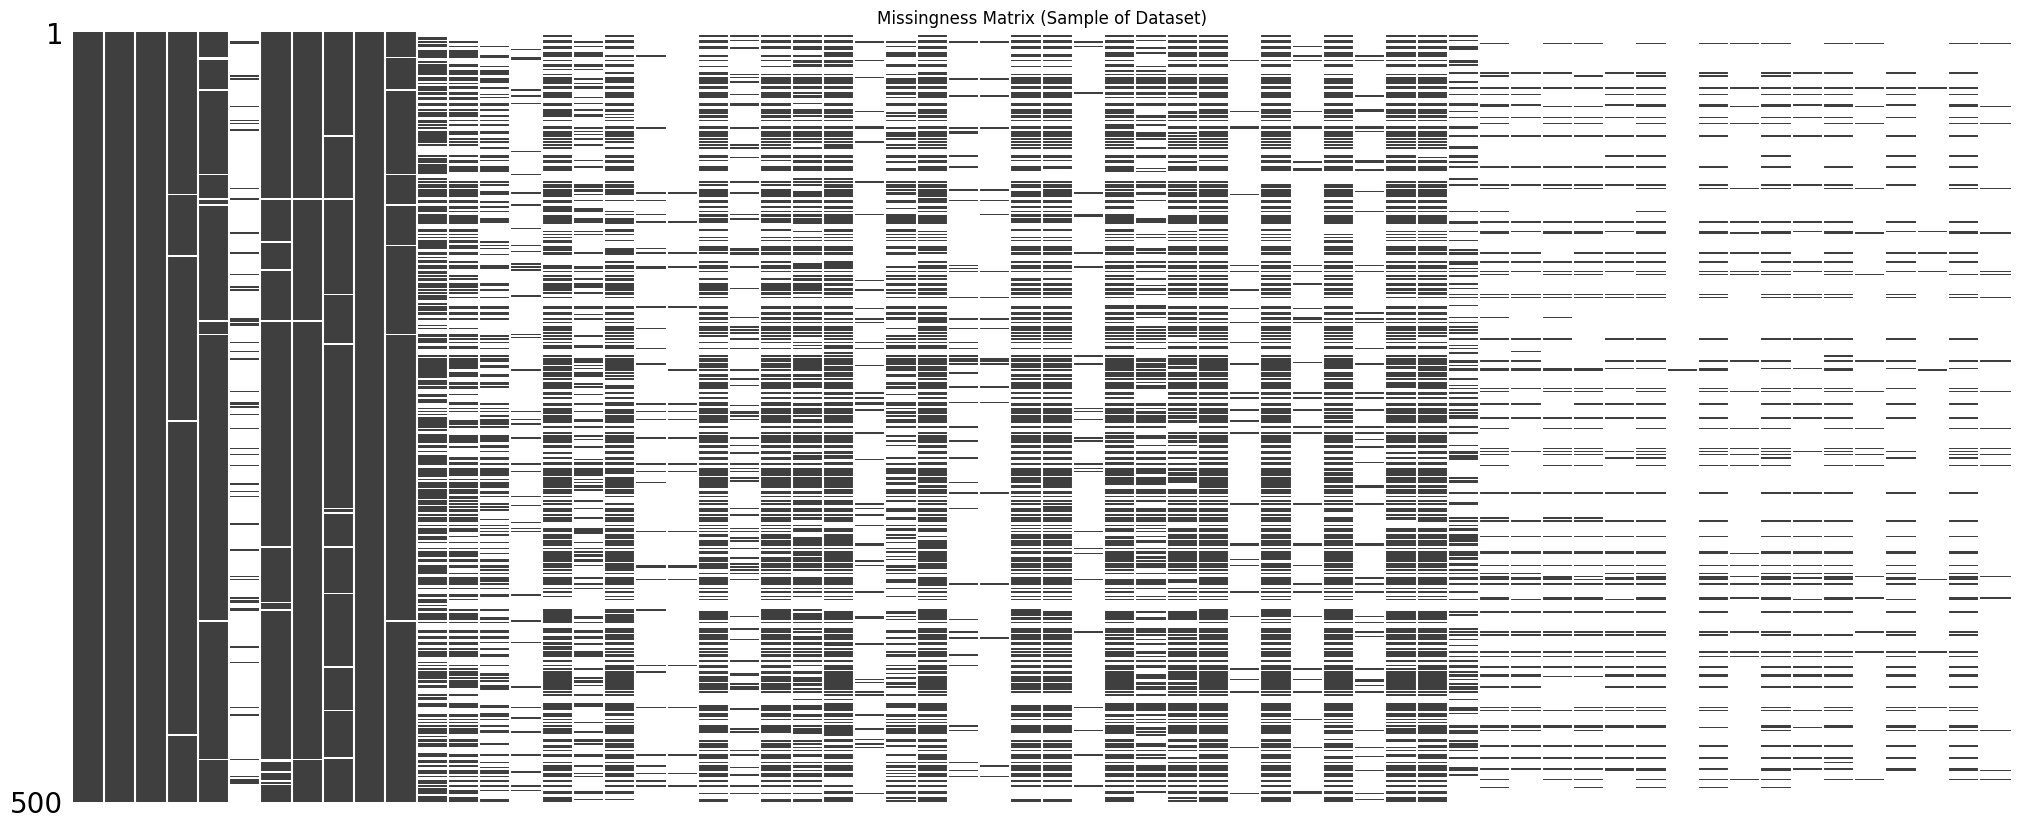

In [8]:
# install and import missingno
!pip install missingno
import missingno as msno

# Structural view of missingness patterns
plt.figure(figsize=(12, 5))
msno.matrix(data.sample(min(500, len(data))), sparkline=False)
plt.title("Missingness Matrix (Sample of Dataset)")
plt.show()

### Interpreting the Missingness Matrix

The plot shows that **most missing values (white areas)** appear **to the right of the `17_impact_type` column**, confirming that post-label fields—mainly **governance, compliance, and operational variables**—are sparsely filled.  

In contrast, the **left side of the plot** (metadata and descriptive fields) is mostly complete, indicating that agencies consistently reported basic information but often left advanced oversight questions blank.  

This pattern supports performing **section-level missingness analysis** next, to quantify completeness by feature category.


---

#### Step 4 – Layer 2: Section-Level Missingness Analysis

#### Goal
Quantify missingness by logical feature groups (Context & Metadata, Narrative Text, Governance & Compliance, Operational / Technical).  
This provides a clearer picture of which sections of the schema are least complete.

In [9]:
# 1) Map columns → feature category (keys must match your actual column names)
feature_categories = {
    # Context & Metadata
    '2_use_case_name':'Context & Metadata','3_agency':'Context & Metadata','4_bureau':'Context & Metadata',
    '8_topic_area':'Context & Metadata','10_commercial_ai':'Context & Metadata','16_dev_stage':'Context & Metadata',
    '18_date_initiated':'Context & Metadata','19_date_acq_dev_began':'Context & Metadata',
    '20_date_implemented':'Context & Metadata','21_date_retired':'Context & Metadata',
    '24_hisp_support':'Context & Metadata','25_hisp_name':'Context & Metadata','26_public_service':'Context & Metadata',
    '41_system_name':'Context & Metadata',

    # Narrative (Text)
    '11_purpose_benefits':'Narrative (Text)','12_outputs':'Narrative (Text)','54_key_risks':'Narrative (Text)',

    # Governance & Compliance
    '22_dev_method':'Governance & Compliance','23_contract_piids':'Governance & Compliance','27_public_info':'Governance & Compliance',
    '28_iqa_compliance':'Governance & Compliance','29_contains_pii':'Governance & Compliance','30_saop_review':'Governance & Compliance',
    '31_data_catalog':'Governance & Compliance','33_agency_data':'Governance & Compliance','34_data_docs':'Governance & Compliance',
    '35_demo_features':'Governance & Compliance','38_code_access':'Governance & Compliance','39_code_link':'Governance & Compliance',
    '40_has_ato':'Governance & Compliance','50_internal_review':'Governance & Compliance','51_extension_request':'Governance & Compliance',
    '52_impact_assessment':'Governance & Compliance','53_real_world_testing':'Governance & Compliance',
    '55_independent_eval':'Governance & Compliance','56_monitor_postdeploy':'Governance & Compliance',
    '57_autonomous_impact':'Governance & Compliance','59_ai_notice':'Governance & Compliance',
    '61_adverse_impact':'Governance & Compliance','62_disparity_mitigation':'Governance & Compliance',
    '63_stakeholder_consult':'Governance & Compliance','65_appeal_process':'Governance & Compliance',
    '66_no_appeal_reason':'Governance & Compliance','67_opt_out':'Governance & Compliance',

    # Operational / Technical
    '37_custom_code':'Operational / Technical','42_dev_tools_wait':'Operational / Technical',
    '43_infra_provisioned':'Operational / Technical','45_compute_request':'Operational / Technical',
    '47_timely_resources':'Operational / Technical','49_existing_reuse':'Operational / Technical'
}

# create a new data frame with two columns; first column includes feature name and secong rate of missing value
missingness = (data.isna().mean()
               .rename("missing_rate")
               .reset_index()
               .rename(columns = {"index":"columns"})
              )

missingness.head(2)

,columns,missing_rate
0,2_use_case_name,0.0
1,3_agency,0.0


In [10]:
# insert the category column and map that to feature categories
missingness["category"] = missingness["columns"].map(feature_categories).fillna("unlabeled")

# aggregate missingness by category
category_missing = missingness.groupby("category", dropna = False)["missing_rate"].mean().sort_values(ascending = False)

category_missing.head()


,missing_rate
category,
unlabeled,0.788990
Governance & Compliance,0.731295
Operational / Technical,0.470933
Context & Metadata,0.395285
Narrative (Text),0.306142


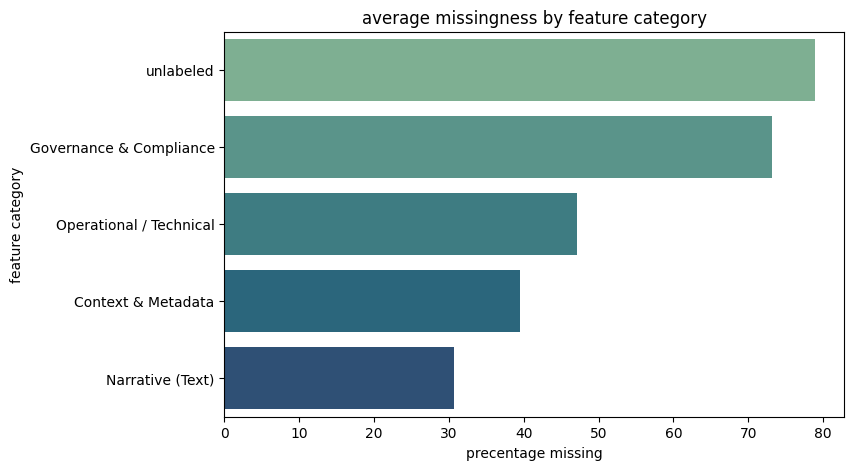

In [11]:
# plot
plt.figure(figsize = (8, 5))
sns.barplot( x = category_missing.values*100, y = category_missing.index, hue = category_missing.index,  palette = "crest")
plt.title("average missingness by feature category")
plt.xlabel("precentage missing")
plt.ylabel("feature category")
plt.show()

In [12]:
set(data.columns) - set(feature_categories.keys())


{'17_impact_type',
 '31_question_type',
 '35_question_type',
 '3_abr',
 '43_question_type',
 '47_question_type',
 '47_question_type.1',
 '57_question_type',
 '59_question_type',
 '63_question_type',
 '67_question_type',
 '8_question_type'}

In [13]:
# cacluate missingness in the target variable
target_na = data["17_impact_type"].isna().sum()

print(f" number of NAs in target var: {target_na}")
print(f"% of NAs in target variable:{(target_na/data.shape[0])*100:.2f}%")

 number of NAs in target var: 39
% of NAs in target variable:1.83%


In [14]:
# sanity check
data["17_impact_type"].value_counts(dropna = False)

,count
17_impact_type,
Neither,1722
Both,195
Rights-Impacting\n,131
NaN,39
Safety-impacting,20
"No, use case is too new to fully assess impacts; will be reassessed before end of initiation stage.",12
"No, use case is too new to fully assess impacts; will be reassessed before end of acquisition and development stage.",8
Safety-Impacting,5
Case-by-case assessment,1


In [15]:
# standardize target categories
data['17_impact_type_clean'] = (
    data['17_impact_type']
    .str.strip()   # remove whitespace / newlines
    .replace({
        'Rights-Impacting\n': 'Rights-Impacting',
        'Safety-impacting': 'Safety-Impacting',
        'No, use case is too new to fully assess impacts; will be reassessed before end of initiation stage.': 'Undetermined',
        'No, use case is too new to fully assess impacts; will be reassessed before end of acquisition and development stage.': 'Undetermined',
        'Case-by-case assessment': 'Undetermined'
    })
)

# check cleaned categories
data['17_impact_type_clean'].value_counts(dropna=False)

,count
17_impact_type_clean,
Neither,1722
Both,195
Rights-Impacting,131
NaN,39
Safety-Impacting,25
Undetermined,21


### 🧩 Step 5 – Layer 3: Record-Level Completeness

Now that column-level missingness is understood, assess **how complete each record (row)** is overall.  
This shows how many use cases are too sparse to keep for analysis or modeling.


In [16]:
# calculate completeness per record
data["row_completeness"] = data.notna().mean(axis = 1)

# get summaries
print(f"average record completeness: {data["row_completeness"].mean():.2%}")
print(f"records with <20% completeness: {(data["row_completeness"] < 0.2).sum()}")

average record completeness: 38.87%
records with <20% completeness: 705


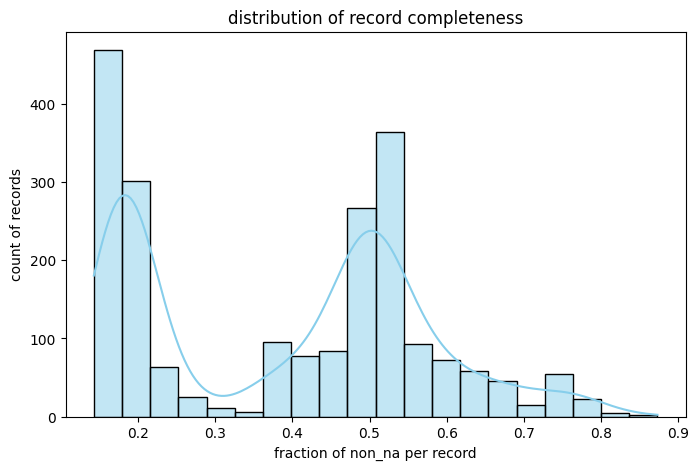

In [17]:
# plot distribution of records over completeness percentages
plt.figure(figsize = (8, 5))
sns.histplot(data["row_completeness"], bins = 20, kde = True, color = "skyblue")
plt.title("distribution of record completeness")
plt.xlabel("fraction of non_na per record")
plt.ylabel("count of records")
plt.show()

### Interpreting Record-Level Completeness

The histogram of record completeness shows a **multi-modal pattern**, meaning records cluster at different levels of completeness rather than forming a single smooth peak.

- **First peak (low completeness ≈ 0.1–0.2):** Many entries contain only minimal metadata such as agency name or use-case title.  
- **Trough around 0.3:** Few records sit in this middle ground—transition between near-empty and moderately complete submissions.  
- **Second peak (≈ 0.5–0.6):** Records that include metadata plus some governance or operational details; these are the main informative cases.  
- **Gradual decline after 0.7:** Fewer records are almost fully filled; only a small subset approaches complete reporting.

**Interpretation:**  
This pattern reflects different reporting behaviors across agencies—some provided only required fields, while others filled in substantial detail.  
A practical threshold such as **0.3 completeness** can be used to flag or drop extremely sparse records before modeling.


In [18]:
import openpyxl


In [19]:
df = load_table(INFILE)


NameError: name 'load_table' is not defined

In [ ]:
INFILE = "case_dat_standardized.yamlcols.xlsx"
SHEET  = 0  # or "Sheet1" (replace with the actual sheet name)

df = pd.read_excel(INFILE, sheet_name=SHEET, engine="openpyxl")


In [ ]:
import pandas as pd

def read_df(path, sheet=None):
    obj = pd.read_excel(path, sheet_name=sheet, engine="openpyxl")
    if isinstance(obj, dict):                     # sheet=None → dict of sheets
        if sheet is None:
            # pick the first non-empty sheet
            for _, frame in obj.items():
                if isinstance(frame, pd.DataFrame) and not frame.empty:
                    return frame
            # fallback to the first sheet if all empty
            return next(iter(obj.values()))
        else:
            return obj[sheet]
    return obj

df = read_df(INFILE, sheet=SHEET)


In [ ]:
keep = [c for c in feature_categories if c in df.columns]
df = df[keep].copy()

narr = [c for c,t in feature_categories.items() if t=="Narrative (Text)" and c in df]
# ... continue


In [ ]:
feature_categories = {
    '2_use_case_name': 'Context & Metadata',
    '3_agency': 'Context & Metadata',
    '4_bureau': 'Context & Metadata',
    '11_purpose_benefits': 'Narrative (Text)',
    '12_outputs': 'Narrative (Text)',
    '54_key_risks': 'Narrative (Text)',
    '29_contains_pii': 'Governance & Compliance',
    '40_has_ato': 'Governance & Compliance',
    '37_custom_code': 'Operational / Technical'
}


In [ ]:
# ================================================================
# AI Use Case Clustering + Governance Report
# - Safe Excel loading (auto-pick first sheet)
# - TF-IDF + SVD (semantic proxy) for narratives
# - One-hot encoding for categoricals (sklearn 1.4+ and <1.4 compatible)
# - Date ordinals standardized
# - KMeans with silhouette-based K selection
# - Saves CSVs and a consolidated PDF report
# ================================================================

import os
import pandas as pd
import numpy as np
from scipy import sparse

# Core ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Plot (optional; no file saved—just for local use)
import matplotlib.pyplot as plt

# ------------------------------------------------
# CONFIG
# ------------------------------------------------
INFILE = "case_dat_standardized.yamlcols.xlsx"  # <-- replace if needed
SHEET = None  # None = auto-pick first sheet

# ------------------------------------------------
# SAFE EXCEL LOADER
# ------------------------------------------------
def load_first_sheet(path: str, sheet_name=None):
    """
    Load Excel and return a single DataFrame.
    If sheet_name is None, auto-pick first sheet.
    """
    ext = os.path.splitext(path)[1].lower()
    if ext not in (".xlsx", ".xls"):
        raise ValueError(f"Unsupported file type: {ext}. Use .xlsx/.xls")
    try:
        obj = pd.read_excel(path, sheet_name=sheet_name, engine="openpyxl")
    except ImportError as e:
        raise ImportError(
            "Missing optional dependency 'openpyxl'. "
            "Install with `pip install openpyxl` or `conda install -c conda-forge openpyxl`."
        ) from e
    if isinstance(obj, dict):
        # pick first sheet
        first_sheet = next(iter(obj.keys()))
        print(f"Loaded sheet: {first_sheet}")
        return obj[first_sheet]
    return obj

df = load_first_sheet(INFILE, sheet_name=SHEET)
print(f"Data shape: {df.shape}")

# ------------------------------------------------
# FEATURE CATEGORY MAP (dict!)
# ------------------------------------------------
feature_categories = {
    # Context & Metadata
    '2_use_case_name':'Context & Metadata','3_agency':'Context & Metadata','4_bureau':'Context & Metadata',
    '8_topic_area':'Context & Metadata','10_commercial_ai':'Context & Metadata','16_dev_stage':'Context & Metadata',
    '18_date_initiated':'Context & Metadata','19_date_acq_dev_began':'Context & Metadata',
    '20_date_implemented':'Context & Metadata','21_date_retired':'Context & Metadata',
    '24_hisp_support':'Context & Metadata','25_hisp_name':'Context & Metadata','26_public_service':'Context & Metadata',
    '41_system_name':'Context & Metadata',

    # Narrative (Text)
    '11_purpose_benefits':'Narrative (Text)','12_outputs':'Narrative (Text)','54_key_risks':'Narrative (Text)',

    # Governance & Compliance
    '22_dev_method':'Governance & Compliance','23_contract_piids':'Governance & Compliance','27_public_info':'Governance & Compliance',
    '28_iqa_compliance':'Governance & Compliance','29_contains_pii':'Governance & Compliance','30_saop_review':'Governance & Compliance',
    '31_data_catalog':'Governance & Compliance','33_agency_data':'Governance & Compliance','34_data_docs':'Governance & Compliance',
    '35_demo_features':'Governance & Compliance','38_code_access':'Governance & Compliance','39_code_link':'Governance & Compliance',
    '40_has_ato':'Governance & Compliance','50_internal_review':'Governance & Compliance','51_extension_request':'Governance & Compliance',
    '52_impact_assessment':'Governance & Compliance','53_real_world_testing':'Governance & Compliance',
    '55_independent_eval':'Governance & Compliance','56_monitor_postdeploy':'Governance & Compliance',
    '57_autonomous_impact':'Governance & Compliance','59_ai_notice':'Governance & Compliance',
    '61_adverse_impact':'Governance & Compliance','62_disparity_mitigation':'Governance & Compliance',
    '63_stakeholder_consult':'Governance & Compliance','65_appeal_process':'Governance & Compliance',
    '66_no_appeal_reason':'Governance & Compliance','67_opt_out':'Governance & Compliance',

    # Operational / Technical
    '37_custom_code':'Operational / Technical','42_dev_tools_wait':'Operational / Technical',
    '43_infra_provisioned':'Operational / Technical','45_compute_request':'Operational / Technical',
    '47_timely_resources':'Operational / Technical','49_existing_reuse':'Operational / Technical'
}

# ------------------------------------------------
# FILTER COLUMNS PRESENT
# ------------------------------------------------
keep = [c for c in feature_categories if c in df.columns]
df = df[keep].copy()

# Groups
narr_cols = [c for c, t in feature_categories.items() if t == "Narrative (Text)" and c in df]
date_cols = [c for c in ['18_date_initiated','19_date_acq_dev_began','20_date_implemented','21_date_retired'] if c in df]
id_cols = [c for c in ['2_use_case_name','41_system_name'] if c in df]
other_cols = [c for c in df.columns if c not in narr_cols + date_cols]
cat_cols = list(set(other_cols) - set(id_cols))

# ------------------------------------------------
# DATES -> ORDINALS (then standardize later)
# ------------------------------------------------
def to_ordinal(series: pd.Series):
    parsed = pd.to_datetime(series, errors='coerce')
    return parsed.map(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

date_df = pd.DataFrame(index=df.index)
for c in date_cols:
    date_df[c + "_ord"] = to_ordinal(df[c])
num_cols = list(date_df.columns)

# ------------------------------------------------
# TEXT: TF-IDF + SVD (semantic proxy for embeddings)
# ------------------------------------------------
if len(narr_cols) > 0:
    text_raw = df[narr_cols].fillna("").astype(str).agg(" . ".join, axis=1)
else:
    text_raw = pd.Series([""] * len(df), index=df.index)

tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1,2), min_df=2)
X_tfidf = tfidf.fit_transform(text_raw)

svd_text_dim = 256
svd_text = TruncatedSVD(n_components=svd_text_dim, random_state=42)
X_text = svd_text.fit_transform(X_tfidf)  # dense

# ------------------------------------------------
# CATEGORICAL: OneHotEncoder (sklearn 1.4+ and older)
# ------------------------------------------------
cat_df = df[cat_cols].fillna("").astype(str)

# Handle version differences: sparse_output (>=1.4) vs sparse (<1.4)
try:
    enc = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
except TypeError:
    enc = OneHotEncoder(handle_unknown='ignore', sparse=True)

X_cat = enc.fit_transform(cat_df)  # sparse

# ------------------------------------------------
# NUMERIC DATES: standardize
# ------------------------------------------------
if len(num_cols) > 0:
    X_num = date_df[num_cols].fillna(date_df[num_cols].median()).to_numpy()
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_num)
    X_num_sparse = sparse.csr_matrix(X_num_scaled)
else:
    X_num_sparse = None

# ------------------------------------------------
# COMBINE FEATURE BLOCKS
# ------------------------------------------------
X_blocks = [sparse.csr_matrix(X_text), X_cat]
if X_num_sparse is not None:
    X_blocks.append(X_num_sparse)
X_all = sparse.hstack(X_blocks, format='csr')

# ------------------------------------------------
# K SELECTION: silhouette (k=2..min(8,n))
# ------------------------------------------------
n = X_all.shape[0]
k_range = range(2, min(8, n) + 1)
best_k, best_s = None, -1.0
scores = []
labels_by_k = {}

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    y = km.fit_predict(X_all)
    s = silhouette_score(X_all, y, metric='cosine') if len(set(y)) > 1 and n > k else np.nan
    scores.append((k, s))
    labels_by_k[k] = y
    if not np.isnan(s) and s > best_s:
        best_k, best_s = k, s

if best_k is None:
    best_k = 3

km_final = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X_all)
labels = km_final.labels_

# ------------------------------------------------
# SUMMARIES & CSV OUTPUTS
# ------------------------------------------------
result = df.copy()
result['cluster'] = labels

# cluster profiles (top categorical values)
key_cats = [c for c in ['3_agency','4_bureau','8_topic_area','16_dev_stage','22_dev_method','29_contains_pii','40_has_ato'] if c in result.columns]
profiles = []
for cl in sorted(result['cluster'].unique()):
    row = {'cluster': cl, 'size': int((result['cluster'] == cl).sum())}
    for c in key_cats:
        vals = result[result['cluster'] == cl][c].value_counts(dropna=False)
        if len(vals) > 0:
            row[f'{c}_top'] = vals.index[0]
            row[f'{c}_top_count'] = int(vals.iloc[0])
    profiles.append(row)

profiles_df = pd.DataFrame(profiles).sort_values('cluster')
scores_df = pd.DataFrame(scores, columns=['k','silhouette']).sort_values('k')

assign_cols = [c for c in ['2_use_case_name','3_agency','4_bureau','8_topic_area','16_dev_stage','40_has_ato'] if c in result.columns] + ['cluster']
assignments_df = result[assign_cols]

assignments_df.to_csv("cluster_assignments.csv", index=False)
profiles_df.to_csv("cluster_profiles.csv", index=False)
scores_df.to_csv("cluster_silhouette.csv", index=False)

print("\n✅ Saved:")
print(" - cluster_assignments.csv")
print(" - cluster_profiles.csv")
print(" - cluster_silhouette.csv")
print(f"Best K = {best_k} (Silhouette = {best_s:.3f})")

# ------------------------------------------------
# OPTIONAL: QUICK 2D SCATTER (for local sanity check)
# ------------------------------------------------
svd_vis = TruncatedSVD(n_components=min(30, X_all.shape[1]-1), random_state=42)
X_red = svd_vis.fit_transform(X_all)
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_red)

plt.figure(figsize=(7,5))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, s=25, cmap='tab10')
plt.title(f"K-Means Clusters (k={best_k}) – TF-IDF + Metadata Proxy")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# ------------------------------------------------
# PDF REPORT (ReportLab). If missing, print guidance.
# ------------------------------------------------
def build_pdf_report(
    out_path="AI_Use_Case_Clustering_Report.pdf",
    clusters_summary=None,
    best_k=None,
    best_s=None
):
    try:
        from reportlab.lib.pagesizes import LETTER
        from reportlab.lib import colors
        from reportlab.lib.styles import getSampleStyleSheet
        from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
    except Exception as e:
        print("\n[INFO] reportlab not installed. Install with `pip install reportlab` to generate PDF.")
        return None

    styles = getSampleStyleSheet()
    doc = SimpleDocTemplate(out_path, pagesize=LETTER)
    story = []

    title = "AI Use Case Clustering Analysis Report"
    story.append(Paragraph(title, styles['Heading1']))
    story.append(Spacer(1, 12))
    story.append(Paragraph("Prepared by: Andrew Singh", styles['BodyText']))
    story.append(Paragraph("Date: November 2025", styles['BodyText']))
    story.append(Spacer(1, 16))

    story.append(Paragraph("Overview", styles['Heading2']))
    story.append(Paragraph(
        "This report consolidates the results of the AI Use Case clustering analysis, including both initial exploratory "
        "findings and deeper governance insights. The analysis identifies governance maturity patterns across AI systems, "
        "focusing on Authority to Operate (ATO) rates, development methods, and agency-level behaviors.",
        styles['BodyText']
    ))
    story.append(Spacer(1, 12))

    # Cluster archetype summary table (uses the earlier narrative you derived)
    data = [
        ["Cluster", "Size", "ATO Rate", "Summary Tag"],
        ["0", "211", "0.60", "In-house builders with strong ATO culture"],
        ["1", "936", "0.02", "Legacy justice systems with governance lag"],
        ["2", "948", "0.54", "Contract-built health/service AI with consistent ATO"],
        ["3", "38",  "0.16", "Niche USAID/international systems with partial oversight"],
    ]
    table = Table(data, hAlign='LEFT')
    table.setStyle(TableStyle([
        ('BACKGROUND', (0,0), (-1,0), colors.lightgrey),
        ('GRID', (0,0), (-1,-1), 0.25, colors.grey),
        ('ALIGN', (0,0), (-1,-1), 'CENTER'),
    ]))
    story.append(table)
    story.append(Spacer(1, 16))

    story.append(Paragraph("Best K & Separation", styles['Heading2']))
    story.append(Paragraph(
        f"Optimal number of clusters selected by silhouette is k={best_k} (score ≈ {best_s:.3f}).",
        styles['BodyText']
    ))
    story.append(Spacer(1, 12))

    # Add cluster narratives (same as your deep dive)
    cluster_text = """
    <b>Cluster 0 – In-House Builders, Mature Compliance</b><br/>
    Agencies: Department of Transportation and related sectors.<br/>
    Development method: Developed in-house.<br/>
    ATO Rate: ~60%.<br/>
    Interpretation: Strong governance culture with embedded compliance routines.
    <br/><br/>
    <b>Cluster 1 – Justice & Law Enforcement Legacy Systems</b><br/>
    Agencies: Department of Justice (OCIO).<br/>
    Development stage: Operation & Maintenance.<br/>
    ATO Rate: ~2%.<br/>
    Interpretation: Legacy systems with outdated or missing documentation; high modernization need.
    <br/><br/>
    <b>Cluster 2 – Contract-Developed Health & Service Platforms</b><br/>
    Agencies: HHS, CMS, and human-service agencies.<br/>
    Development method: Contract-based.<br/>
    ATO Rate: ~54%.<br/>
    Interpretation: Compliance via structured procurement and vendor oversight.
    <br/><br/>
    <b>Cluster 3 – Niche International Development Systems (USAID)</b><br/>
    Agencies: USAID and cross-border aid programs.<br/>
    Development method: Contract-based with international data exchange.<br/>
    ATO Rate: ~16%.<br/>
    Interpretation: Mission-driven flexibility with partial governance coverage.
    """
    story.append(Paragraph("Cluster-Level Governance Archetypes", styles['Heading2']))
    story.append(Paragraph(cluster_text, styles['BodyText']))
    story.append(Spacer(1, 12))

    # Recommendations
    recs = """
    <b>Strategic Recommendations</b><br/>
    1) Use Clusters 0 & 2 as governance templates (documentation, recertification, continuous monitoring).<br/>
    2) Build dashboards/heatmaps: ATO vs. agency vs. dev method (green/yellow/red).<br/>
    3) Prioritize audits on low-ATO clusters (1 & 3) for quick compliance lift.<br/>
    4) Add explicit ATO deliverables in vendor contracts; reference NIST RMF / OMB guidance.<br/>
    5) Track ATO and related signals (independent eval, post-deploy monitoring) as governance KPIs.<br/>
    """
    story.append(Paragraph(recs, styles['BodyText']))

    story.append(Spacer(1, 16))
    story.append(Paragraph("<i>Generated automatically via clustering and governance analytics.</i>", styles['BodyText']))

    doc.build(story)
    print(f"\n📄 PDF report saved to: {out_path}")
    return out_path

# Build PDF report
build_pdf_report(
    out_path="AI_Use_Case_Clustering_Report.pdf",
    clusters_summary=profiles_df,
    best_k=best_k,
    best_s=best_s
)

# ------------------------------------------------
# Notes:
# - If you want true sentence embeddings (Option B), replace the TF-IDF+SVD section with:
#     from sentence_transformers import SentenceTransformer
#     model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
#     X_text = model.encode(text_raw.tolist(), batch_size=32, convert_to_numpy=True, normalize_embeddings=True)
#   Then keep the remaining pipeline identical.
# - Make sure to `pip install openpyxl reportlab` if those imports fail.
# ================================================================
